In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib
import seaborn as sns

%matplotlib inline

In [2]:
matplotlib.style.use('seaborn')

/tmp/ipykernel_29315/2976479467.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn')


In [3]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['font.size'] = '14'

In [4]:
df = pd.read_json(open('data/nobel_winners_cleaned.json'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   link            971 non-null    object
 1   name            971 non-null    object
 2   year            971 non-null    int64 
 3   category        970 non-null    object
 4   country         971 non-null    object
 5   text            971 non-null    object
 6   date_of_birth   971 non-null    object
 7   date_of_death   673 non-null    object
 8   place_of_birth  971 non-null    object
 9   place_of_death  670 non-null    object
 10  gender          971 non-null    object
 11  award_age       971 non-null    int64 
 12  born_in         127 non-null    object
 13  mini_bio        451 non-null    object
 14  bio_image       451 non-null    object
dtypes: int64(2), object(13)
memory usage: 113.9+ KB


In [5]:
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   link            971 non-null    object        
 1   name            971 non-null    object        
 2   year            971 non-null    int64         
 3   category        970 non-null    object        
 4   country         971 non-null    object        
 5   text            971 non-null    object        
 6   date_of_birth   971 non-null    datetime64[ns]
 7   date_of_death   673 non-null    datetime64[ns]
 8   place_of_birth  971 non-null    object        
 9   place_of_death  670 non-null    object        
 10  gender          971 non-null    object        
 11  award_age       971 non-null    int64         
 12  born_in         127 non-null    object        
 13  mini_bio        451 non-null    object        
 14  bio_image       451 non-null    object        
dtypes: dat

<Axes: xlabel='gender'>

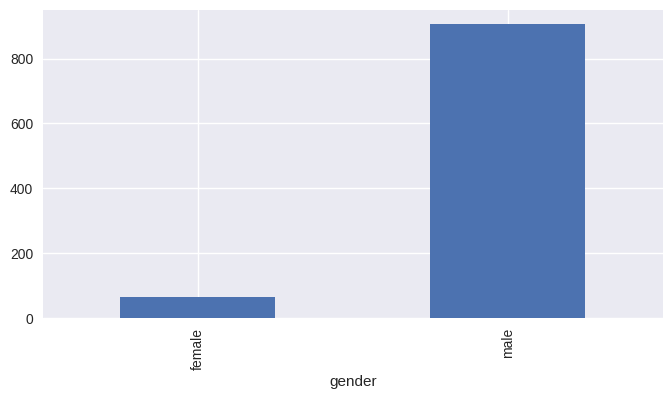

In [6]:
by_gender = df.groupby('gender')
by_gender.size().plot(kind='bar')

<Axes: xlabel='country'>

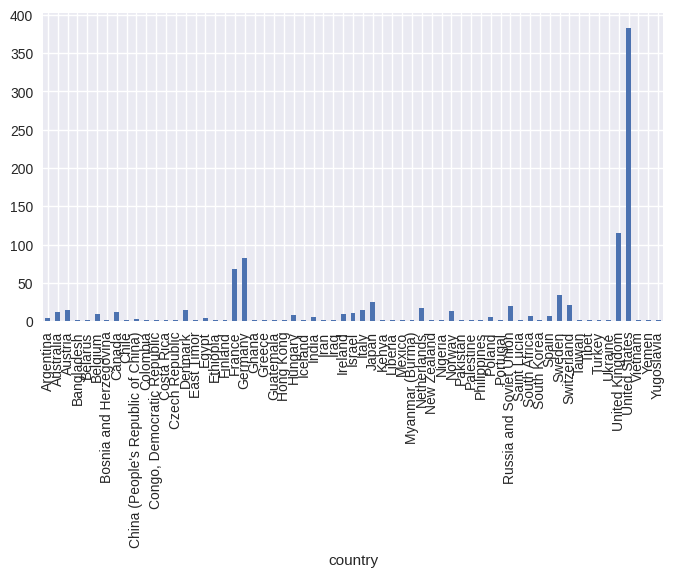

In [7]:
by_country = df.groupby('country')
by_country.size().plot(kind='bar')

<Axes: xlabel='category'>

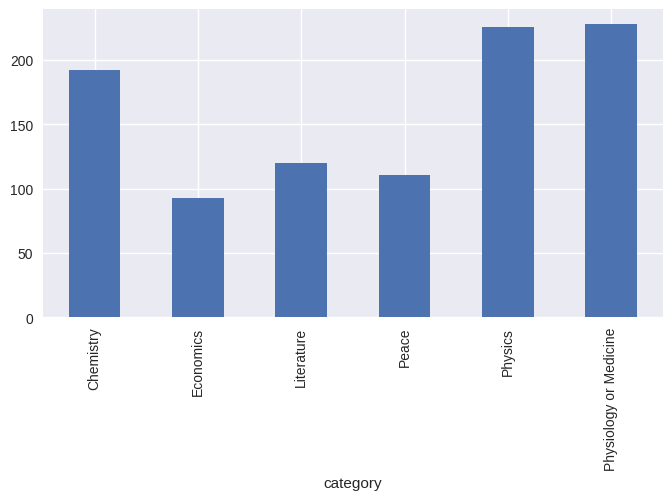

In [8]:
by_category = df.groupby('category')
by_category.size().plot(kind='bar')

In [9]:
by_gender.size()

gender
female     65
male      906
dtype: int64

In [10]:
by_cat_gen = df.groupby(['category','gender'])
by_cat_gen.get_group(('Physics','female'))[['name','year']]

,name,year
100,Maria Goeppert-Mayer,1963
391,Andrea Ghez,2020
578,Anne L'Huillier,2023
618,Marie Skłodowska-Curie,1903
946,Donna Strickland,2018


In [11]:
by_cat_gen.size()

category                gender
Chemistry               female      8
                        male      184
Economics               female      3
                        male       90
Literature              female     17
                        male      103
Peace                   female     19
                        male       92
Physics                 female      5
                        male      221
Physiology or Medicine  female     13
                        male      215
dtype: int64

<Axes: ylabel='category,gender'>

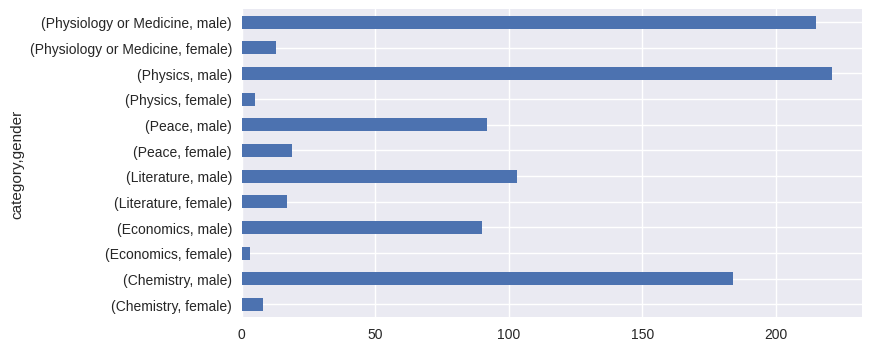

In [12]:
by_cat_gen.size().plot(kind='barh')

<Axes: ylabel='category'>

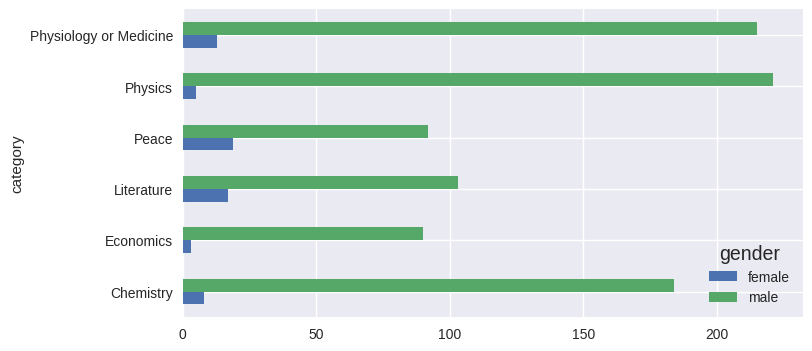

In [13]:
by_cat_gen.size().unstack().plot(kind='barh')

In [14]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz.head()

gender,female,male
category,,
Chemistry,8,184
Economics,3,90
Literature,17,103
Peace,19,92
Physics,5,221


In [15]:
cat_gen_sz['ratio'] = cat_gen_sz.female/(cat_gen_sz.female + cat_gen_sz.male)
cat_gen_sz.head()

gender,female,male,ratio
category,,,
Chemistry,8,184,0.041667
Economics,3,90,0.032258
Literature,17,103,0.141667
Peace,19,92,0.171171
Physics,5,221,0.022124


Text(0.5, 0, '% of feamle winners')

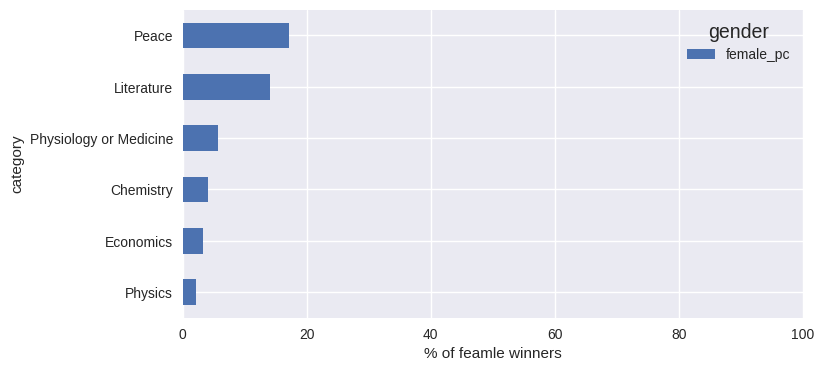

In [16]:
cat_gen_sz['female_pc'] = cat_gen_sz['ratio']*100
cat_gen_sz = cat_gen_sz.sort_values(by='female_pc',ascending=True)
ax=cat_gen_sz[['female_pc']].plot(kind='barh')
ax.set_xlim([0,100])
ax.set_xlabel('% of feamle winners')


Text(0.5, 0, '% of feamle winners')

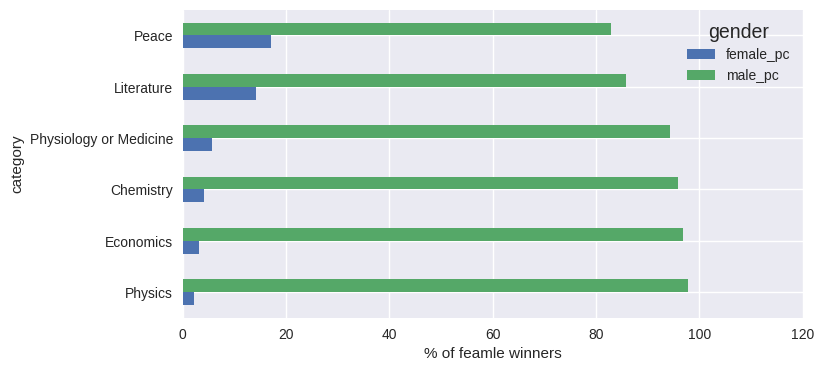

In [17]:
cat_gen_sz["female_pc"] = cat_gen_sz["ratio"] * 100
cat_gen_sz["male_pc"] = 100 -(cat_gen_sz["ratio"] * 100)
cat_gen_sz = cat_gen_sz.sort_values(by="female_pc", ascending=True)
ax = cat_gen_sz[["female_pc",'male_pc']].plot(kind="barh")
ax.set_xlim([0, 120])
ax.set_xlabel("% of feamle winners")

Text(0.5, 0, '% of feamle winners')

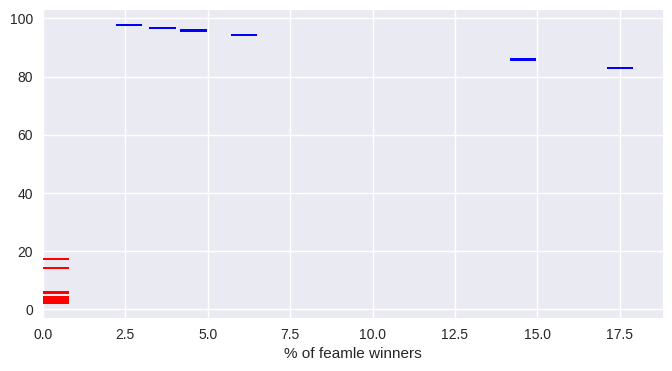

In [18]:
cat_gen_sz["female_pc"] = cat_gen_sz["ratio"] * 100
cat_gen_sz["male_pc"] = 100 - (cat_gen_sz["ratio"] * 100)
cat_gen_sz = cat_gen_sz.sort_values(by="female_pc", ascending=True)
# ax = cat_gen_sz[["female_pc",'male_pc']].plot(kind="barh")
# ax = cat_gen_sz[["female_pc",'male_pc']].plot(kind="barh")
fig, ax = plt.subplots(figsize=(8, 4))
xlocs = np.arange(0,100)
ax.barh(cat_gen_sz["female_pc"],width=0.8,color='r')
ax.barh(cat_gen_sz["male_pc"],width=0.8,color='b',left=cat_gen_sz["female_pc"])
# ax.set_xlim([0, 120])
ax.set_xlabel("% of feamle winners")


In [19]:
df[(df.category == "Physics") & (df.gender == "female")][["name", "country", "year"]]

,name,country,year
100,Maria Goeppert-Mayer,United States,1963
391,Andrea Ghez,United States,2020
578,Anne L'Huillier,Sweden,2023
618,Marie Skłodowska-Curie,Poland,1903
946,Donna Strickland,Canada,2018


<Axes: xlabel='year'>

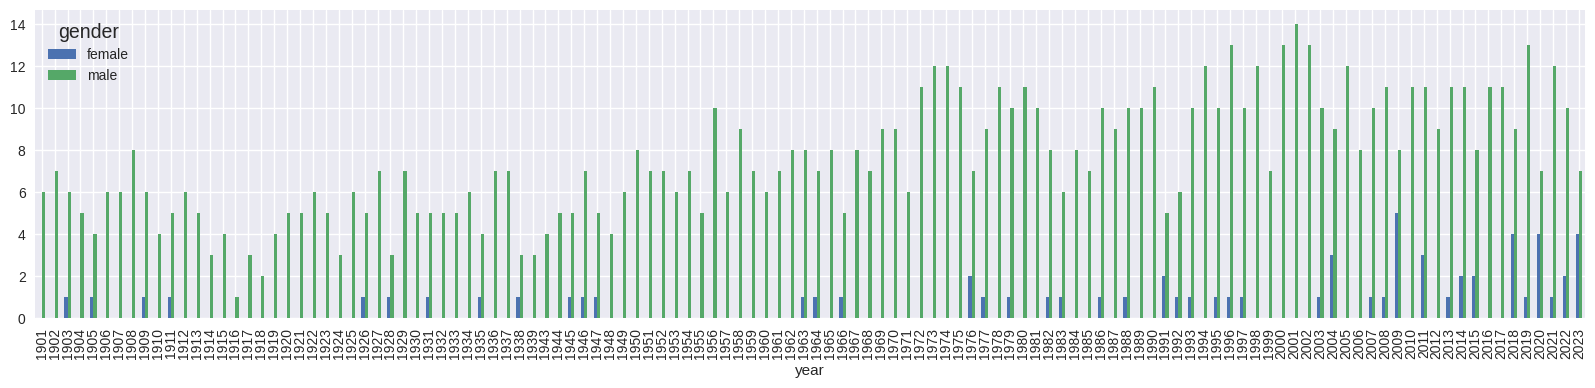

In [20]:
by_year_gender= df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar',figsize=(20,4))

In [21]:
def thin_xtrics(ax, tick_gap=10, rotation=45):
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]

    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    ax.figure.show()

In [22]:
by_year_gender= df.groupby(['year','gender'])
by_year_gender.size().unstack()

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,7.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,4.0
...,...,...
2019,1.0,13.0
2020,4.0,7.0
2021,1.0,12.0


Text(0.5, 0, 'Year')

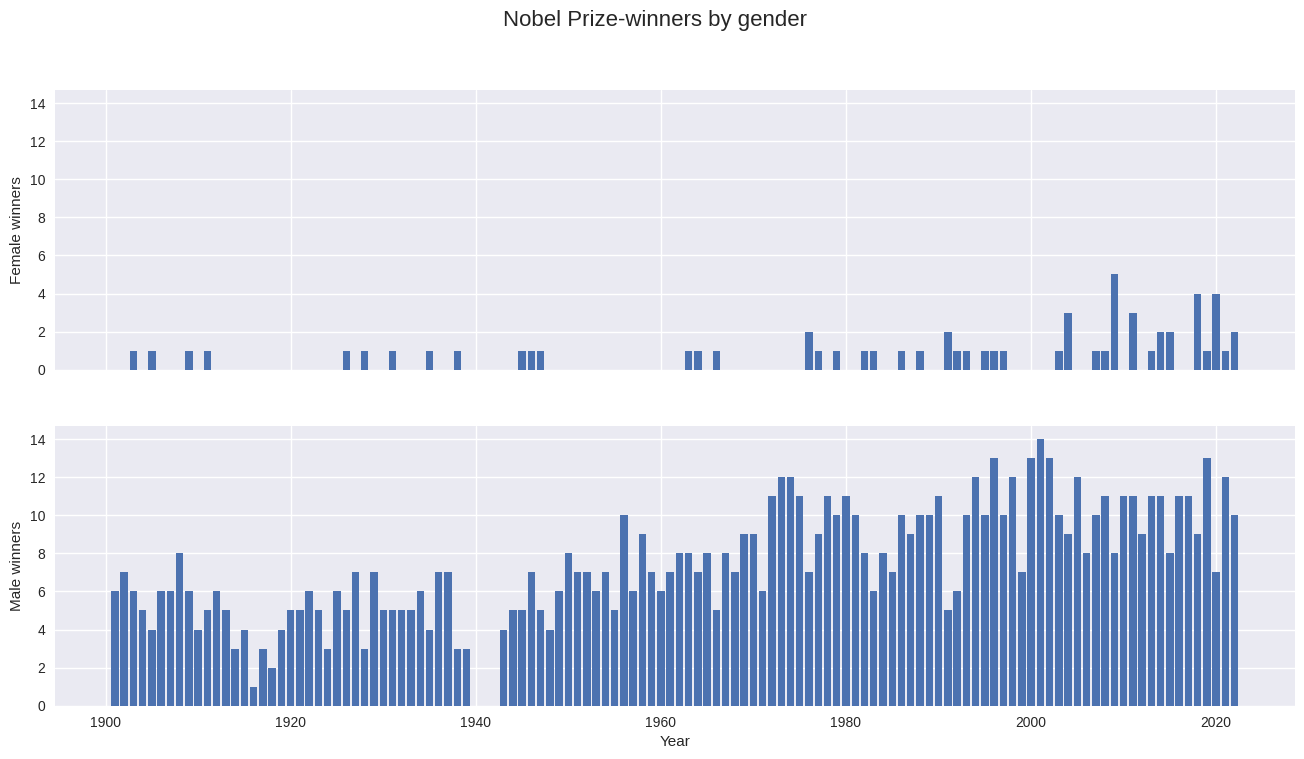

In [24]:
new_index = pd.Index(np.arange(1901, 2023), name="year")
by_year_gender = df.groupby(["year", "gender"])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(16, 8))
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle("Nobel Prize-winners by gender", fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel("Female winners")
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel("Male winners")
ax_m.set_xlabel("Year")